# Import required libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report

# Upload / access the dataset

In [15]:
df=pd.read_csv("ecg_autoencoder_dataset.csv",header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.608558,-0.335651,-0.990948,-1.784153,-2.626145,-2.957065,-2.931897,-2.664816,-2.090137,-1.461841,...,1.757705,2.291923,2.704595,2.451519,2.017396,1.704358,1.688542,1.629593,1.342651,0
4994,-2.060402,-2.860116,-3.405074,-3.748719,-3.513561,-3.006545,-2.234850,-1.593270,-1.075279,-0.976047,...,1.388947,2.079675,2.433375,2.159484,1.819747,1.534767,1.696818,1.483832,1.047612,0
4995,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,-0.645363,...,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334,0
4996,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,-1.374321,...,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932,0


In [16]:
x=df.drop([140],axis=1)
y=df[140]

In [8]:
x.shape

(4998, 140)

In [10]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4993    0
4994    0
4995    0
4996    0
4997    0
Name: 140, Length: 4998, dtype: int64

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [21]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

# Encoder 

In [22]:
encoder=Sequential()
encoder.add(Dense(64,input_shape=(x_train.shape[1],),activation='relu'))

# Decoder 

In [24]:
decoder=Sequential()
decoder.add(Dense(x_train.shape[1],activation='sigmoid'))

In [25]:
autoencoder=Sequential([encoder,decoder])

In [26]:
autoencoder.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [27]:
history=autoencoder.fit(x_train,x_train,epochs=50)  ##validation_data=(x_test,x_test)

Epoch 1/50


110/110 [==============================] - 1s 1ms/step - loss: 0.8619 - accuracy: 0.0309
Epoch 2/50
110/110 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.0789
Epoch 3/50
110/110 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.0858
Epoch 4/50
110/110 [==============================] - 0s 2ms/step - loss: 0.6588 - accuracy: 0.1035
Epoch 5/50
110/110 [==============================] - 0s 2ms/step - loss: 0.6522 - accuracy: 0.1175
Epoch 6/50
110/110 [==============================] - 0s 2ms/step - loss: 0.6480 - accuracy: 0.1398
Epoch 7/50
110/110 [==============================] - 0s 1ms/step - loss: 0.6448 - accuracy: 0.1589
Epoch 8/50
110/110 [==============================] - 0s 1ms/step - loss: 0.6423 - accuracy: 0.1710
Epoch 9/50
110/110 [==============================] - 0s 2ms/step - loss: 0.6403 - accuracy: 0.1830
Epoch 10/50
110/110 [==============================] - 0s 1ms/step - loss: 0.6388 - accuracy: 0.18

In [31]:
loss,accuracy=autoencoder.evaluate(x_test,x_test)
print(f"Test Loss:{loss}")
print(f"Test Accuracy:{accuracy}")

47/47 [==============================] - 0s 1ms/step - loss: 0.6288 - accuracy: 0.2580
Test Loss:0.6288000345230103
Test Accuracy:0.257999986410141


# Compile the models with Optimizer, Loss, and Evaluation Metrics

In [32]:
decoder_data=autoencoder.predict(x_test)
mse=np.mean(np.power(x_test-decoder_data,2),axis=1)
threshold=np.percentile(mse,95)

outliers=mse>threshold
print("Confusion Matrix:\n",confusion_matrix(y_test,outliers))
print("Classifiaction_report:\n",classification_report(y_test,outliers))

47/47 [==============================] - 0s 741us/step
Confusion Matrix:
 [[564  53]
 [861  22]]
Classifiaction_report:
               precision    recall  f1-score   support

           0       0.40      0.91      0.55       617
           1       0.29      0.02      0.05       883

    accuracy                           0.39      1500
   macro avg       0.34      0.47      0.30      1500
weighted avg       0.34      0.39      0.25      1500



In [35]:
num_outliers=np.sum(outliers)
num_anomalies=np.sum(y_test[outliers]==1)

In [36]:
print(f"Number of outliers: {num_outliers}")
print(f"Number of anomalies: {num_anomalies}")

Number of outliers: 75
Number of anomalies: 22


# Plot the Graph

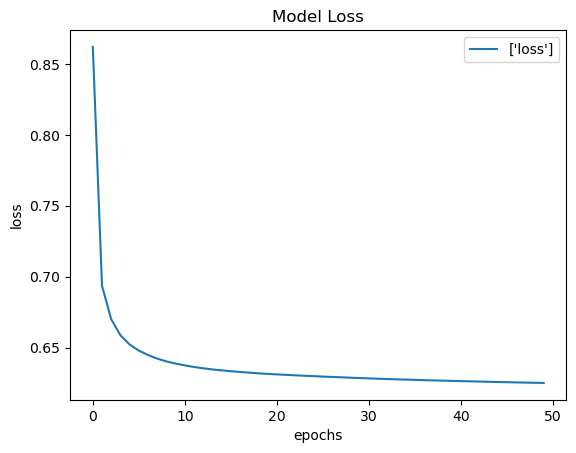

In [38]:
plt.plot(history.history['loss'],label=['loss'])
plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

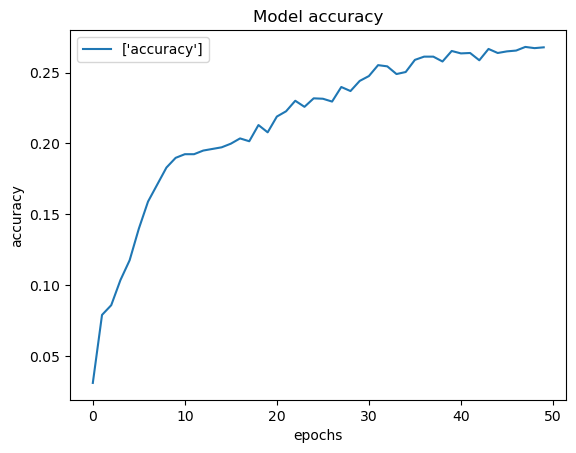

In [39]:
plt.plot(history.history['accuracy'],label=['accuracy'])
plt.title('Model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()